In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12
# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')
# We will display plots right inside Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns
sns.set()
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv')
df.head(5)

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  ...  Total night charge  Total intl minutes  \
0                     25  ...               11.01                10.0   
1                     26  ...               11.45                13.7   
2                      0  ...                7.32                12.2   
3                      0  ...                8.86                 6.6   
4                      0  ...                8.41                10.1   

   Total intl calls  Total intl charge  Customer service calls  Churn  
0                 3               2.70                       1  False  
1                 3               3.70                       1  False  
2                 5               3.29                       0  False  
3                 7               1.78                       2  False  
4                 3               2.73                       3  False  

[5 rows x 20 columns]

# 1. Признаки по одному
## 1.1. Количественные признаки

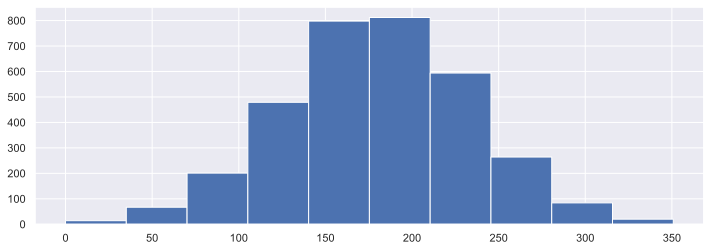

In [93]:
df['Total day minutes'].hist(figsize=(12, 4));

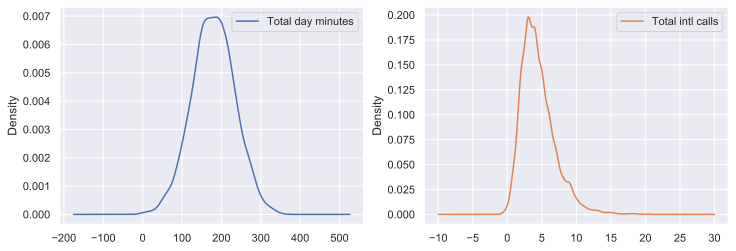

In [94]:
features = ['Total day minutes', 'Total intl calls']
df[features].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12, 4));

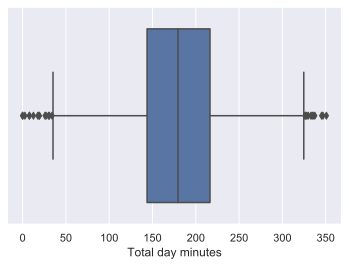

In [95]:
sns.boxplot(df['Total day minutes']);

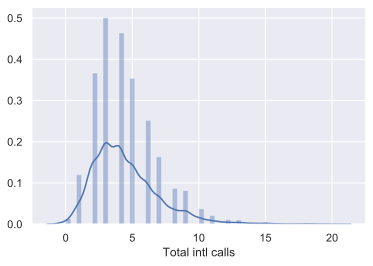

In [96]:
sns.distplot(df['Total intl calls']);

## 1.2. Категориальные и бинарные признаки##

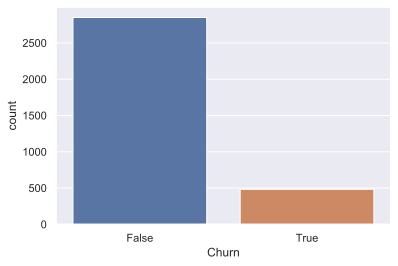

In [80]:
sns.countplot(df['Churn']);

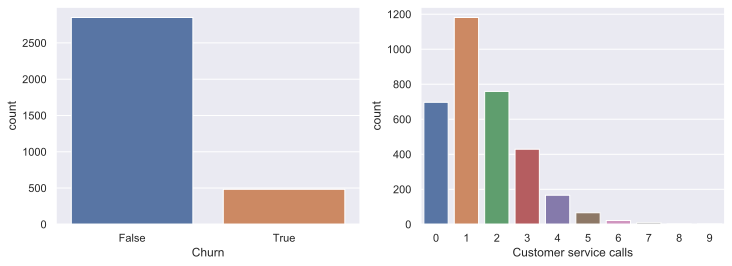

In [81]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

In [82]:
df[df['State'].isin(df['State'].value_counts().head().index)]

State  Account length  Area code International plan Voice mail plan  \
1       OH             107        415                 No             Yes   
3       OH              84        408                Yes              No   
5       AL             118        510                Yes              No   
9       WV             141        415                Yes             Yes   
15      NY             161        415                 No              No   
...    ...             ...        ...                ...             ...   
3310    NY              94        415                 No              No   
3324    WV             159        415                 No              No   
3325    OH              78        408                 No              No   
3326    OH              96        415                 No              No   
3329    WV              68        415                 No              No   

      Number vmail messages  ...  Total night charge  Total intl minutes  \
1                        26  ...               11.45                13.7   
3                         0  ...                8.86                 6.6   
5                         0  ...                9.18                 6.3   
9                        37  ...               14.69                11.2   
15                        0  ...                7.23                 5.4   
...                     ...  ...                 ...                 ...   
3310                      0  ...               10.12                13.6   
3324                      0  ...                8.72                11.6   
3325                      0  ...               10.95                 9.3   
3326                      0  ...                8.05                14.9   
3329                      0  ...                8.61                 9.6   

      Total intl calls  Total intl charge  Customer service calls  Churn  
1                    3               3.70                       1  False  
3                    7               1.78                       2  False  
5                    6               1.70                       0  False  
9                    5               3.02                       0  False  
15                   9               1.46                       4   True  
...                ...                ...                     ...    ...  
3310                17               3.67                       2  False  
3324                 4               3.13                       1  False  
3325                 4               2.51                       2  False  
3326                 7               4.02                       1  False  
3329                 4               2.59                       3  False  

[431 rows x 20 columns]

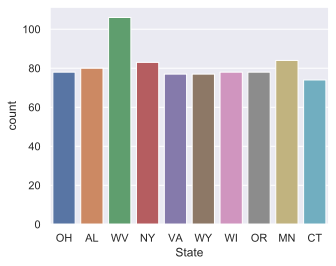

In [7]:
sns.countplot(df[df['State'].isin(df['State'].value_counts().head(10).index)]['State']);

____
# 2. Взаимодействия признаков#
## 2.1. Количественные с количественными##

In [8]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

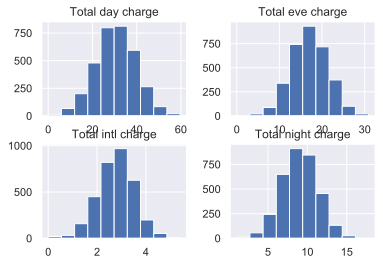

In [6]:
features = [f for f in df.columns if 'charge' in f]
df.hist(features);

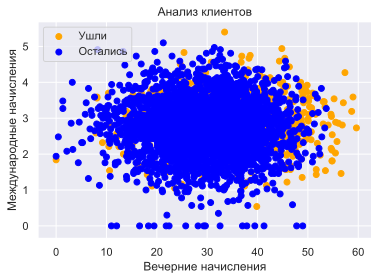

In [97]:
plt.scatter(df[df['Churn']]['Total day charge'], df[df['Churn']]['Total intl charge'], color='orange', 
            label='Ушли');
plt.scatter(df[~df['Churn']]['Total day charge'], df[~df['Churn']]['Total intl charge'], color='blue', 
            label='Остались');
plt.xlabel('Вечерние начисления');
plt.ylabel('Международные начисления');
plt.title('Анализ клиентов');
plt.legend();

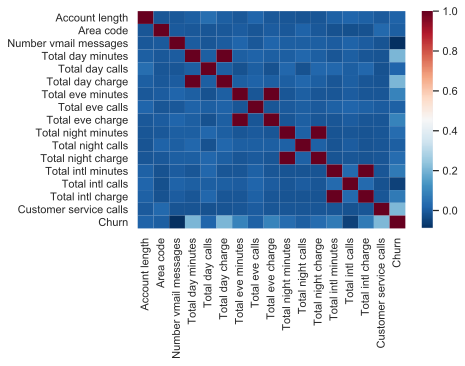

In [84]:
sns.heatmap(df.corr(), cmap="RdBu_r");

## 2.2. Количественные с категориальными/ Количественные с бинарными##

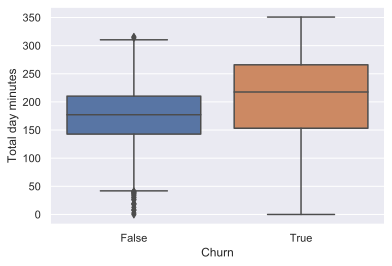

In [4]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

In [7]:
df.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

## 2.3. Категориальные с категориальными/ бинарными ##

In [14]:
pd.crosstab(df['Churn'], df['International plan'])

International plan    No  Yes
Churn                        
False               2664  186
True                 346  137

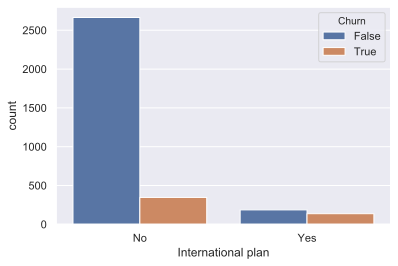

In [100]:
sns.countplot(x='International plan', hue = 'Churn', data = df);

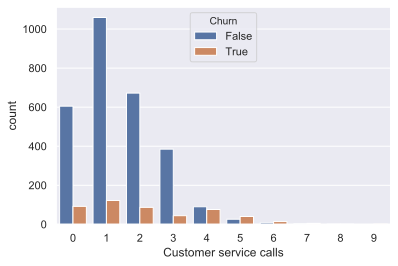

In [91]:
sns.countplot(x='Customer service calls', hue = 'Churn', data = df);

____
# 3. Dataset участников ODS#

In [22]:
poll_data = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master'
                        + '/data/mlcourse_open_first_survey_parsed.csv', index_col='id')

In [23]:
poll_data.head()

Timestamp  \
id                                 
0   2016/12/05 10:39:59 am GMT+3   
1   2016/12/05 10:44:27 am GMT+3   
2   2016/12/05 10:47:07 am GMT+3   
3   2016/12/05 10:47:22 am GMT+3   
5   2016/12/05 10:58:34 am GMT+3   

                           Представьтесь в 2-3 фразах  \
id                                                      
0                                    крутой Developer   
1   Разработчик Navision. Изучаю тему DS для возмо...   
2   Я Software Engeneer разработчик, активно интер...   
3   Семилетний инженер. Специализируюсь в компьюте...   
5                          программист. pl/sql python   

   Работали ли Вы с Jupyter notebooks?  \
id                                       
0                                   Да   
1                                   Да   
2                                   Да   
3                                   Да   
5                                   Да   

                               Что Вы ждете от курса?  \
id                                                      
0   Ребята, вижу ваш настрой, уверен курс будет ин...   
1   Практики, подкрепленной теорией. Хочется упоря...   
2     Побольше практики на реальных данных (задачах).   
3        Глубокого разбора алгоритмов и инструментов.   
5                                  Упорядочить знания   

   Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?  \
id                                                                                                     
0                                           Starcraft                                                  
1                                                 NaN                                                  
2                                          basketball                                                  
3                                                 NaN                                                  
5                                              футбол                                                  

   Ладно, посерьезней: согласны ли Вы на обработку персональных данных?  ...  \
id                                                                       ...   
0                                                  Да                    ...   
1                                                  Да                    ...   
2                                                  Да                    ...   
3                                                  Да                    ...   
5                                                  Да                    ...   

    Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]  \
id                                                                
0                                                 -12             
1                                                 NaN             
2                                                 NaN             
3                                                 -12             
5                                                 -12             

   Сколько параметров у нормального распределения?  \
id                                                   
0                                              2.0   
1                                              2.0   
2                                              2.0   
3                                              2.0   
5                                              2.0   

   Сможете написать на Python генератор чисел Фибоначчи?  \
id                                                         
0                                                  Да      
1                                     Да, но фиговый.      
2                                                  Да      
3                                                  Да      
5                                                  Да      

    Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или gith

In [24]:
rename_dic = dict(zip(poll_data.columns, 
                      ['time', 'intro', 'jupyter', 'expect',
                       'sport', 'personal', 'math_level', 'quest1',
                       'quest2', 'quest3', 'fib_gen', 'python', 
                       'github', 'movie']))

In [25]:
poll_data.rename(columns=rename_dic, inplace=True)

In [26]:
jupyter_levels = poll_data['jupyter'].map({'Да': 1, 
                                          'Нет': 0}).fillna(2)

In [27]:
jupyter_levels.value_counts()

1.0    2071
0.0     766
2.0     107
Name: jupyter, dtype: int64

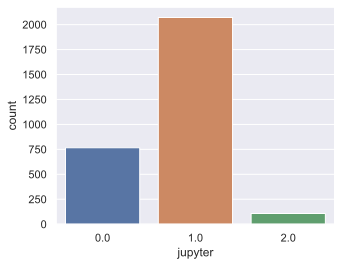

In [28]:
sns.countplot(jupyter_levels);

In [29]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

0.9244036697247706

In [30]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s: 
                                                        s.strip().split()).values)

In [31]:
import nltk

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\503118528\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
nltk.corpus.stopwords.words('russian')[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [34]:
words_series = pd.Series(list(all_words))
words_series[~words_series.isin(
    nltk.corpus.stopwords.words('russian'))].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
хочу        122
dtype: int64

# 4. Многомерная визуализация #
## 4.1. Количественные с количественными##

In [85]:
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 
                      'Voice mail plan', 'Area code', 'Churn',
                      'Customer service calls']))
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 
                      'Total night charge', 'Total intl charge']))

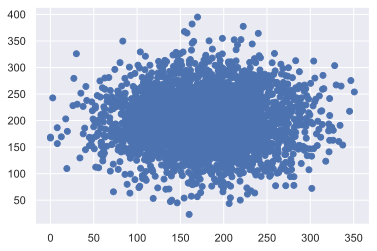

In [86]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

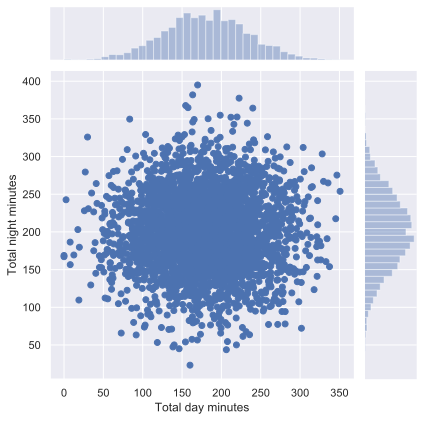

In [87]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter');

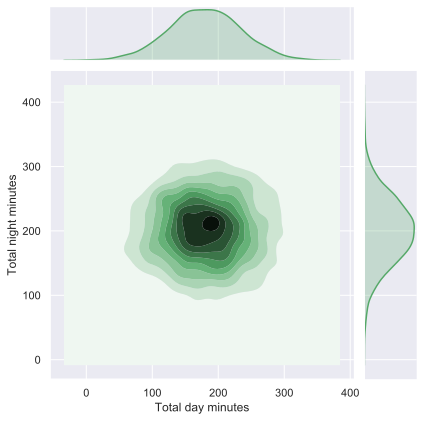

In [57]:
sns.jointplot('Total day minutes', 'Total night minutes',
              data=df, kind="kde", color="g");

## 4.2. Количественные с категориальными ##

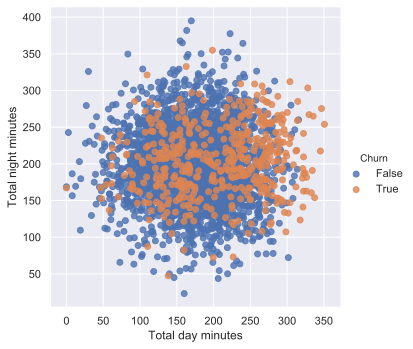

In [58]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, 
           hue='Churn', fit_reg=False);

## 4.3 Категориальные с категориальными ##

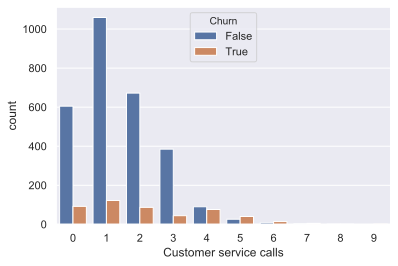

In [92]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

# 5. t-SNE#

In [64]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [66]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
%%time 
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

Wall time: 28.3 s


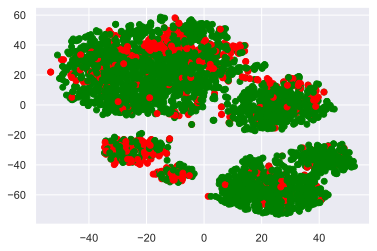

In [71]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],c=df['Churn'].map({False: 'green', True: 'red'}));

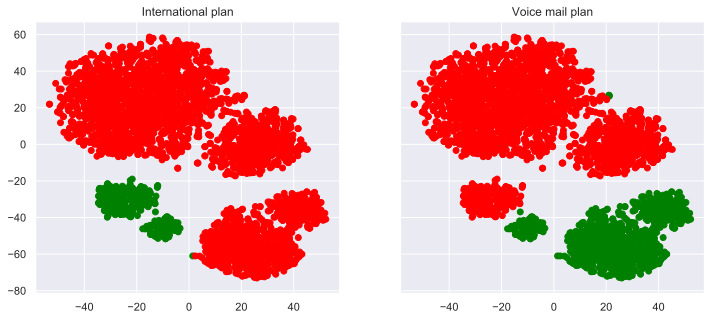

In [73]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'green', 'No': 'red'}))
    axes[i].set_title(name)